In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50
## Install xlrd package to load Excel files
# conda install openpyxl
## conda install xlrd

# Linear Regression (Tuseday)

## 0. importing the data

In [2]:
# import the data
df = pd.read_csv('C:/Users/dengd/Documents/GitHub/IronDuo/Class_Materials/Case_Studies/Customer_Analysis_Case_Study/Data/Data_Marketing_Customer_Analysis_Round3.csv')

# delet one column
df.drop(columns=['effective_to_date'], inplace = True)

### 1. X-y split (y is the target variable, which is the total claim amount)

In [3]:
X = df.drop('total_claim_amount', axis=1)
y = df.total_claim_amount

### 2. Getting numerical and categorical columns

### 3.concatenate the numerical and catergorical columns

In [4]:
X['number_of_open_complaints'] = X['number_of_open_complaints'].astype('object')

In [5]:
numericalX = X.select_dtypes(include=[np.number])
categoricalX = X.select_dtypes(include=[object])

In [6]:
categoricalX

,region,response,coverage,education,month,employment_status,gender,location_code,marital_status,number_of_open_complaints,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,basic,college,feb,employed,m,suburban,married,0,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,west region,no,basic,college,jan,unemployed,f,suburban,single,0,personal auto,personal l3,offer4,call center,four-door car,medsize
2,east,no,basic,bachelor,feb,employed,m,suburban,single,0,personal auto,personal l3,offer3,call center,suv,medsize
3,north west,yes,extended,college,jan,employed,m,suburban,single,0,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,north west,no,premium,bachelor,jan,medical leave,f,suburban,married,0,personal auto,personal l2,offer1,branch,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,no,premium,bachelor,jan,unemployed,f,suburban,married,0,personal auto,personal l1,offer3,web,luxury car,medsize
10685,north west,no,basic,college,jan,employed,f,urban,married,0,personal auto,personal l3,offer2,branch,four-door car,medsize
10686,central,no,extended,bachelor,feb,employed,f,rural,married,0,corporate auto,corporate l3,offer1,web,luxury suv,medsize
10687,west region,no,premium,college,feb,employed,f,urban,divorced,4,personal auto,personal l1,offer1,branch,suv,medsize


In [7]:
from scipy.stats import iqr
def remove_outliers(df):
    for c in df.columns:
            pct_75 = np.percentile(df[c], 75)
            pct_25 = np.percentile(df[c], 25)
            upper_bound = pct_75 + 1.5*iqr(df[c])
            lower_bound = pct_25 - 1.5*iqr(df[c])
            condition = (df[c] < upper_bound) & (df[c] > lower_bound)
            df[c] = df[c][condition]  # Filter out the outliers
    return df

In [8]:
X = pd.concat([pd.get_dummies(categoricalX,drop_first=True),remove_outliers(X[numericalX.columns])],axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 54 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   region_east                      10689 non-null  uint8  
 1   region_north west                10689 non-null  uint8  
 2   region_west region               10689 non-null  uint8  
 3   response_yes                     10689 non-null  uint8  
 4   coverage_extended                10689 non-null  uint8  
 5   coverage_premium                 10689 non-null  uint8  
 6   education_college                10689 non-null  uint8  
 7   education_doctor                 10689 non-null  uint8  
 8   education_high school or below   10689 non-null  uint8  
 9   education_master                 10689 non-null  uint8  
 10  month_jan                        10689 non-null  uint8  
 11  employment_status_employed       10689 non-null  uint8  
 12  employment_status_

C:\Users\dengd\anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)
C:\Users\dengd\AppData\Local\Temp\ipykernel_2476\504253479.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[c] = df[c][condition]  # Filter out the outliers


In [15]:
na_idcs = X[X.isna().any(axis=1)].index
X = pd.DataFrame(X).drop(na_idcs)
y = pd.DataFrame(y).drop(na_idcs)

### 4. Train-test split.

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.3, random_state= 34)

X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
X_train.head(3)

,region_east,region_north west,region_west region,response_yes,coverage_extended,coverage_premium,education_college,education_doctor,education_high school or below,education_master,...,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_medsize,vehicle_size_small,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_policies
6274,0,0,1,0,1,0,0,0,1,0,...,0,0,1,0,5384.0,82045,78.0,14,68,5.0
5619,0,1,0,0,0,0,0,0,1,0,...,0,1,1,0,2596.0,28706,72.0,3,65,1.0
7915,0,0,1,0,1,0,0,0,1,0,...,0,1,1,0,3031.0,56677,86.0,7,31,1.0


### 5. Standardize the data (after the data split).

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

In [19]:
X_train_s

array([[-0.30298394, -0.6235303 ,  1.36584576, ..., -0.11822048,
         0.71778588,  1.06223735],
       [-0.30298394,  1.6037713 , -0.73214709, ..., -1.21033288,
         0.61071218, -0.81975457],
       [-0.30298394, -0.6235303 ,  1.36584576, ..., -0.8132011 ,
        -0.60278969, -0.81975457],
       ...,
       [-0.30298394, -0.6235303 ,  1.36584576, ...,  0.47747719,
        -1.67352664,  2.00323331],
       [-0.30298394, -0.6235303 , -0.73214709, ...,  0.47747719,
        -1.56645295, -0.81975457],
       [-0.30298394, -0.6235303 ,  1.36584576, ...,  1.07317486,
        -1.0667757 , -0.81975457]])

### 6. Apply linear regression.

In [22]:
# import statsmodels.api as sm

# # Fit a linear regression model using statsmodels
# X_train_const = sm.add_constant(X_train) # adding a constant in the model
# model = sm.OLS(y_train, X_train_const).fit()

# # Print the summary of the regression results
# print(model.summary())

In [23]:
import statsmodels.api as sm

# Fit a linear regression model using statsmodels
X_train_const = sm.add_constant(X_train_s) # adding a constant in the model
model_train = sm.OLS(y_train, X_train_const).fit()

In [24]:
X_test_const = sm.add_constant(X_test_s) # adding a constant in the model
model_test = sm.OLS(y_test, X_test_const).fit() 

In [25]:
# Print the summary of the regression results
print(model_test.summary())

                            OLS Regression Results                            
Dep. Variable:     total_claim_amount   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     162.2
Date:                Wed, 01 Feb 2023   Prob (F-statistic):               0.00
Time:                        19:21:33   Log-Likelihood:                -16469.
No. Observations:                2677   AIC:                         3.304e+04
Df Residuals:                    2624   BIC:                         3.336e+04
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        399.1707      2.271    175.741      0.0

### 7. model parameters

In [26]:
model=LinearRegression()    # model
model.fit(X_train_s, y_train)   # model train

LinearRegression()

In [27]:
model.coef_

array([[ 2.45956359e+00,  8.66818680e-01,  1.98887016e+00,
        -4.23445718e+00, -2.74579688e+00,  4.61621816e-01,
        -4.24822876e+00, -3.15220090e+00,  1.60706464e+00,
        -2.02705911e+00,  1.25900505e+00,  2.59907944e-01,
         3.52953796e+00,  1.87489520e+00,  3.40105246e+01,
         7.29538689e+00,  1.73233065e+02,  8.09480432e+01,
         1.63878691e+00,  2.95310312e+01, -1.57462306e+00,
        -2.47086764e+00, -1.69621357e+00,  2.62788618e+00,
        -2.40894152e+00, -4.44976989e+13, -4.40493514e+14,
        -1.86178104e+00, -2.19809153e+00,  3.50929834e+13,
         4.34217464e+13,  4.97839388e+13,  1.94389893e+14,
         2.93653617e+14,  2.73886771e+14,  4.12582527e+00,
         1.30303492e+00,  9.64678106e-01, -1.03574380e+00,
        -1.01158018e-01,  3.14190697e-01,  6.20306895e-01,
        -2.66436412e+00, -8.17180571e-01, -1.09856291e+00,
        -2.15656890e+00,  2.92969440e+00,  8.11402197e+00,
        -1.88949985e+00, -6.47956521e+00,  1.12881458e+0

### 8. Making prediction

In [28]:
y_pred = model.predict(X_test_s)  # model prediction
y_pred_train = model.predict(X_train_s)

# Evaluating Model Performance (Wednesday)

In [29]:
result= pd.DataFrame({"y_test": list(y_test),"y_pred": list(y_pred)})
result

ValueError: All arrays must be of the same length

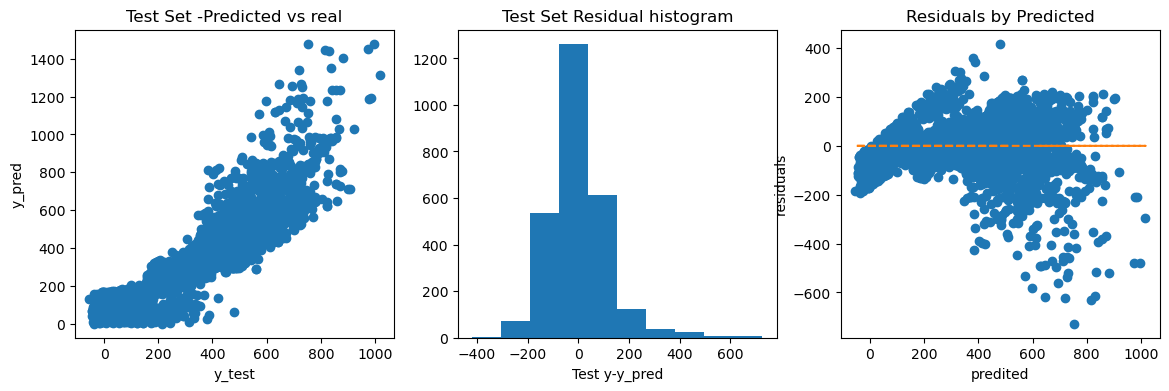

In [30]:
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line
fig, ax = plt.subplots(1,3,figsize=(14,4))

ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

ax[1].hist(y_test-y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred, y_pred - y_test, "o")
ax[2].set_xlabel("predited")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

C:\Users\dengd\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='total_claim_amount'>

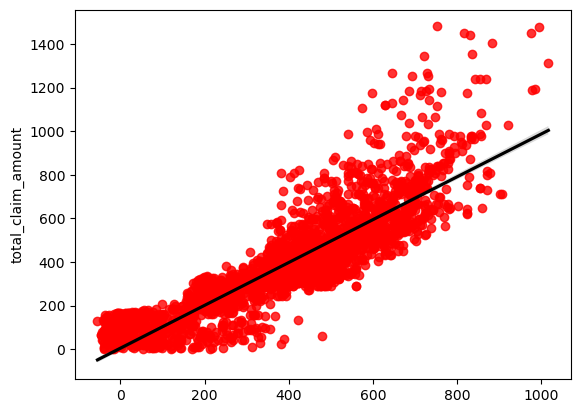

In [31]:
yp_ = y_pred
yt_ = y_test
sns.regplot(yp_,yt_,scatter_kws={"color": "red"}, line_kws={"color": "black"})

### 2. Error metrics

In [33]:
import math
print(mse(y_test,y_pred)) # MSE(Mean squared error)
print(mae(y_test,y_pred)) # MAE (Mean Absolute Error)
print(math.sqrt(mae(y_test,y_pred)))# RMSE(Root Mean Square Error)
print(mse(y_train,y_pred_train)) # Mean Squared Error

13479.538969811003
85.38372660937414
9.240331520533998
14416.840922213518


In [34]:
# R squared
R2= r2_score(y_test,y_pred)
R2

0.7523918465918099

In [35]:
# adjusted R squared
R2_test=model.score(X_test_s,y_test)
R2_train=model.score(X_train_s,y_train)
Adj_R2= 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
Adj_R2

0.747292365171504

### 3. Feature Importances

In [36]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(model.coef_.reshape(len(X_train.columns),))
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)
features_importances

,Attribute,Importance
26,policy_type_special auto,4.404935e+14
33,policy_special l2,2.936536e+14
34,policy_special l3,2.738868e+14
32,policy_special l1,1.943899e+14
31,policy_personal l3,4.978394e+13
...,...,...
41,vehicle_class_luxury car,6.203069e-01
5,coverage_premium,4.616218e-01
40,sales_channel_web,3.141907e-01
11,employment_status_employed,2.599079e-01


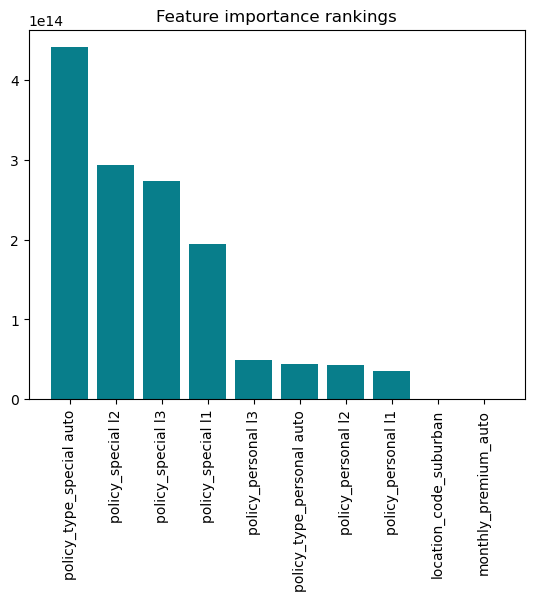

In [37]:
plt.bar(x=features_importances['Attribute'].iloc[:10], height=features_importances['Importance'].iloc[:10], color='#087E8B')
plt.title('Feature importance rankings', size=12)
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:xlabel='policy_type', ylabel='total_claim_amount'>

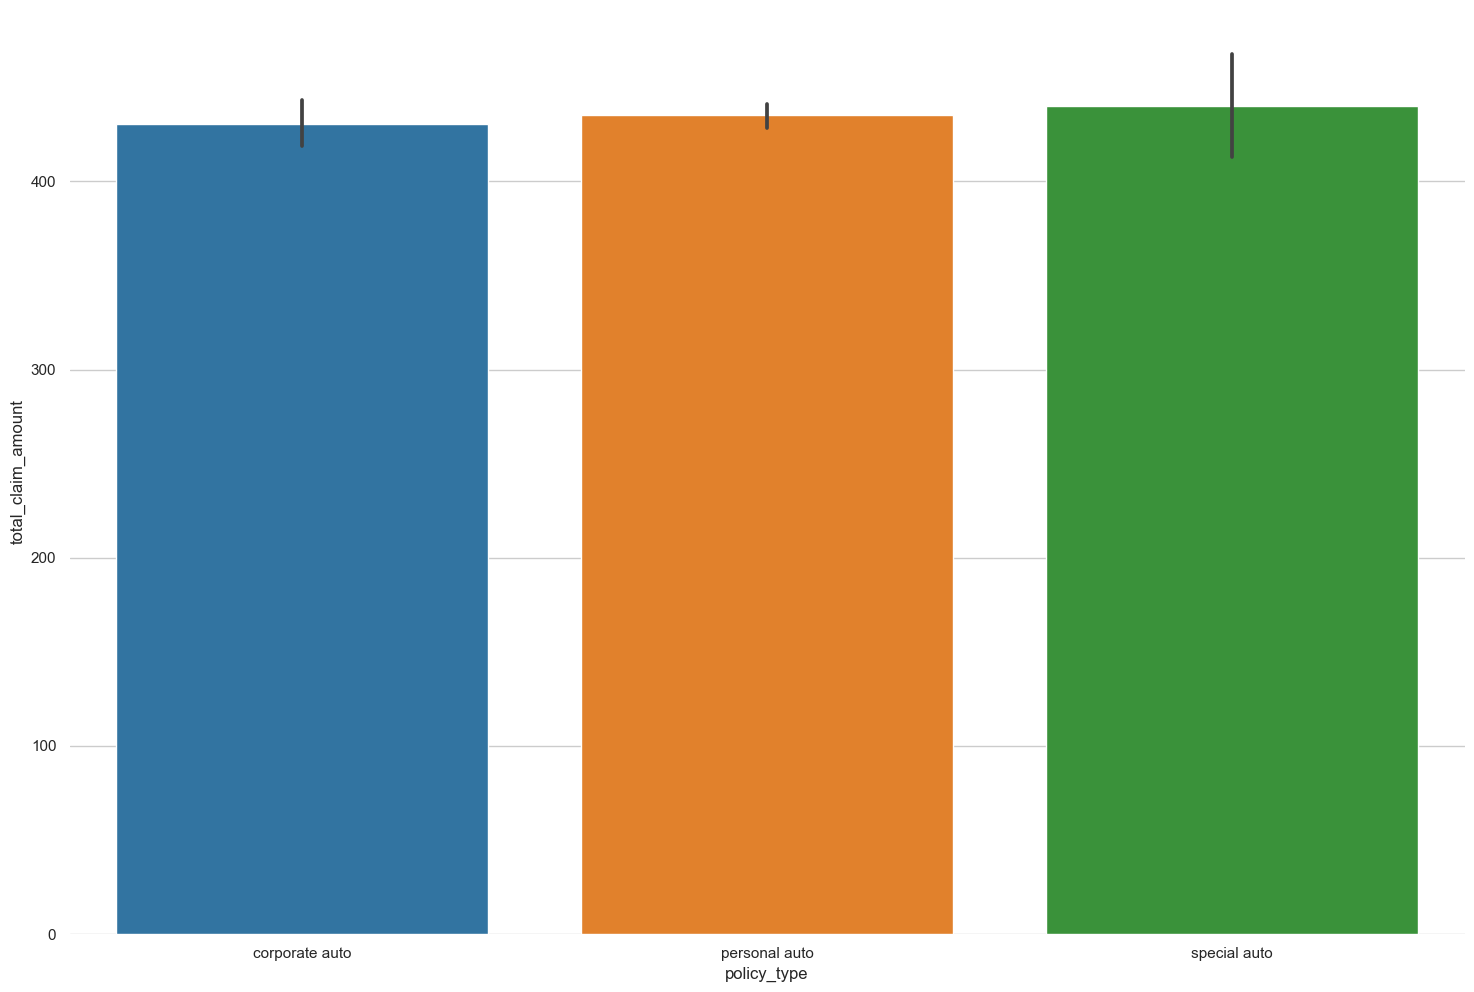

In [39]:
sns.set_style('whitegrid')
sns.set_context('notebook')
sns.color_palette("bright")

f, ax = plt.subplots(figsize=(18, 12))
sns.despine(f, left=True, bottom=True)
sns.barplot(x="policy_type", y='total_claim_amount', data=df, ax=ax)

# Model Iteration (Wednesday and Thursday)